# Car prices Dataset (ANN-Project)

###### Importing Libraries

In [1]:
#Import all the necessary packages
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings( "ignore")

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler 

###### Loading Dataset

In [2]:
df=pd.read_csv("CarPricesData.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1434 non-null   float64
 2   KM         1436 non-null   int64  
 3   FuelType   1432 non-null   object 
 4   HP         1436 non-null   int64  
 5   MetColor   1436 non-null   int64  
 6   Automatic  1436 non-null   int64  
 7   CC         1434 non-null   float64
 8   Doors      1436 non-null   int64  
 9   Weight     1434 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


###### Shape of Data

In [4]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1436 
no. of columns:  10


###### Duplicate Rows

In [5]:
df.duplicated().sum()

1

###### Removing Duplicates

In [6]:
df.drop_duplicates(inplace=True)

The 'drop_duplicates()' method considers the entire row when checking for duplicates. 

In [7]:
df.duplicated().sum()

0

###### Sample 10 rows

In [8]:
df.sample(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
286,11700,40.0,44830,Petrol,110,1,0,1600.0,5,1075.0
837,9750,67.0,67110,Petrol,86,1,0,1300.0,5,1035.0
933,9950,65.0,55061,Petrol,110,1,0,1600.0,5,1070.0
1003,10250,62.0,39000,Petrol,110,1,0,1600.0,5,1075.0
595,10500,56.0,19313,Petrol,97,0,0,1400.0,3,1025.0
635,8750,68.0,125000,Diesel,72,1,0,2000.0,3,1115.0
438,10250,55.0,77780,Petrol,110,0,0,1600.0,3,1040.0
875,9900,68.0,62222,Petrol,110,0,0,1600.0,5,1075.0
1210,7950,73.0,87000,Petrol,86,1,0,1300.0,3,1015.0
770,7950,64.0,78356,Petrol,86,1,0,1300.0,3,1015.0


###### Statistical summary of the data

In [9]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
mean,10720.915679,56.020237,68571.782578,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


* count: Number of non-null entries.
* mean: Mean (average) of the values.
* std: Standard deviation, which measures the amount of variation or dispersion of a set of values.
* min: Minimum value.
* 25%: First quartile (25th percentile).
* 50%: Median or second quartile (50th percentile).
* 75%: Third quartile (75th percentile).
* max: Maximum value.

These statistics provide a summary of the central tendency, dispersion, and shape of the distribution of each attribute in dataset.

###### Visual distribution of Categorical variables

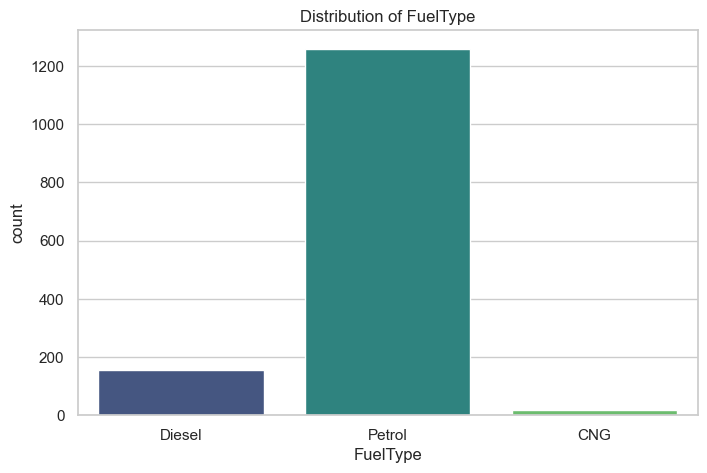

In [10]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Get the list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='FuelType', data=df, palette="viridis")
    plt.title(f'Distribution of {column}')
    plt.show()

* 'sns.countplot' is used to create a bar plot for each categorical variable.
* palette="viridis" specifies the color palette.
* The loop goes through each categorical column in the DataFrame and creates a separate bar plot for each.

###### Visual distribution of Continuous variables

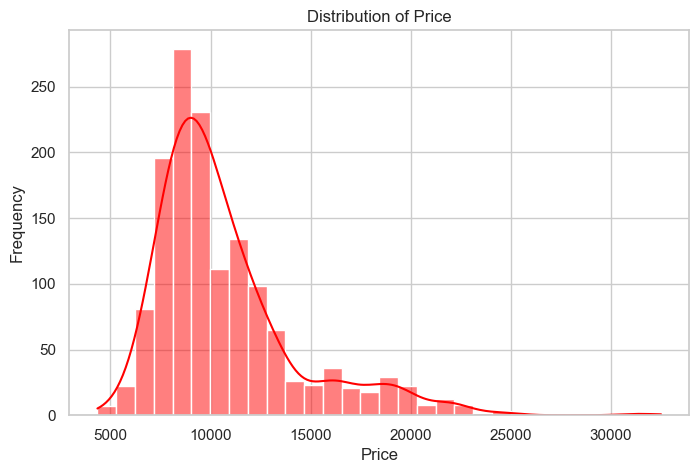

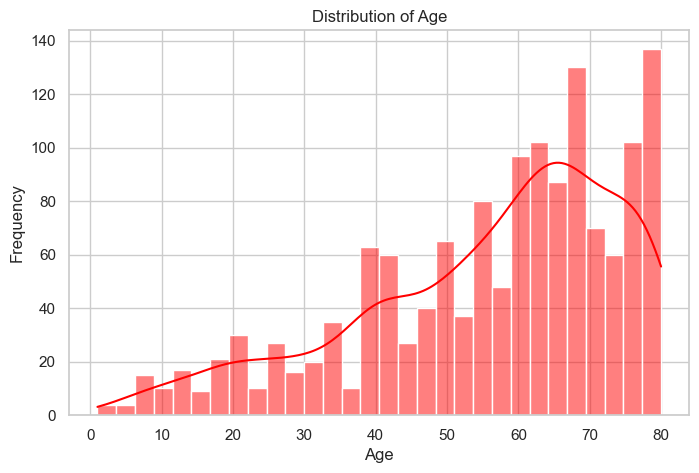

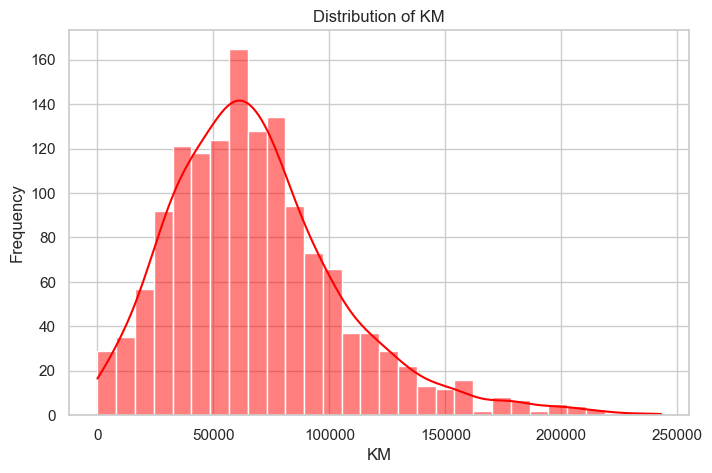

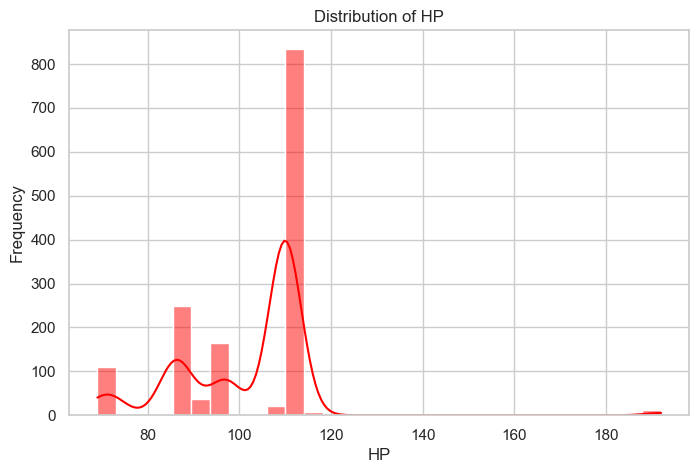

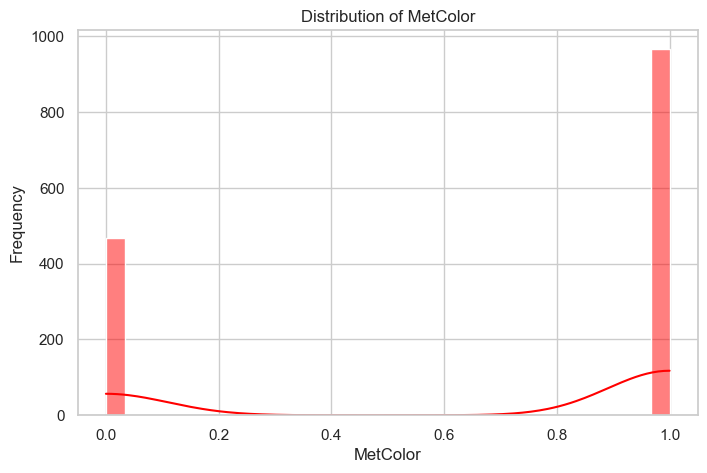

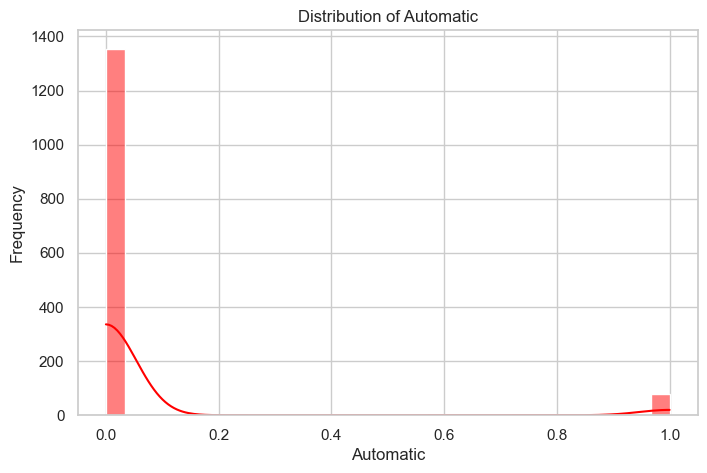

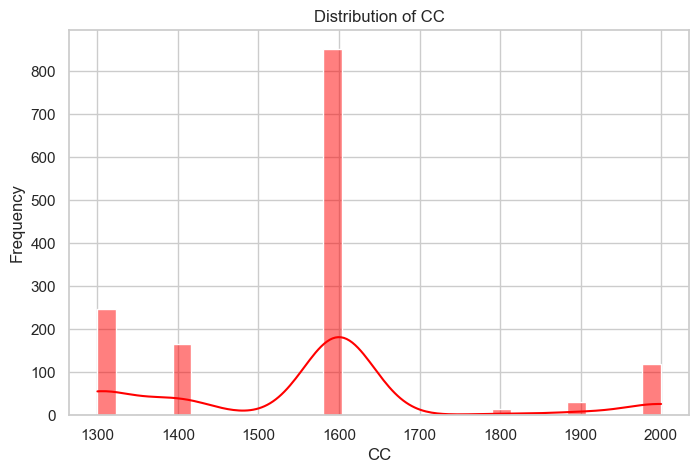

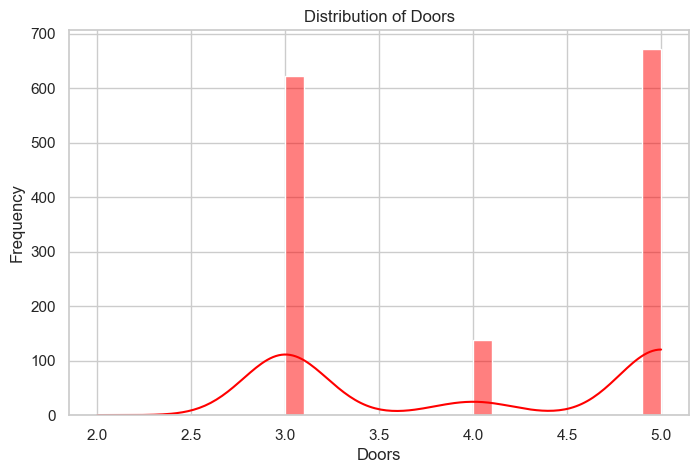

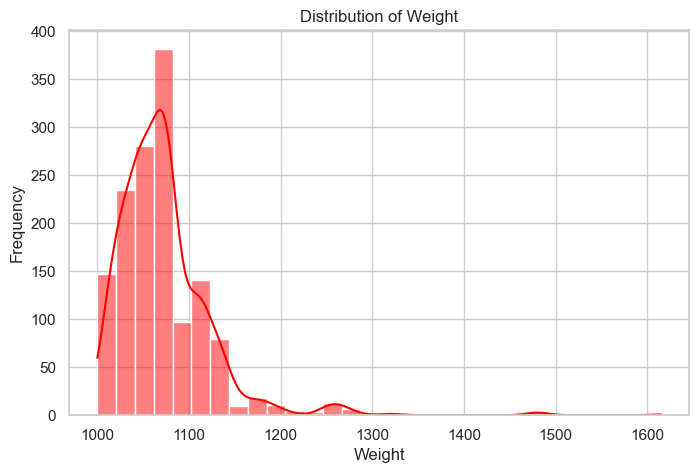

In [11]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Get the list of continuous columns
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for each continuous column
for column in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, color='red',bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

* 'sns.histplot' is used to create a histogram for each continuous variable.
* kde=True adds a kernel density estimate to the histogram for a smoother representation of the distribution.
* The loop goes through each continuous column in the DataFrame and creates a separate histogram for each.

#### Finding outliers using Boxplot

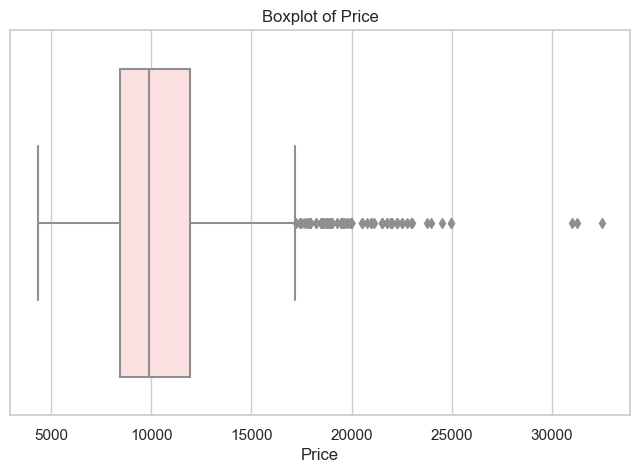

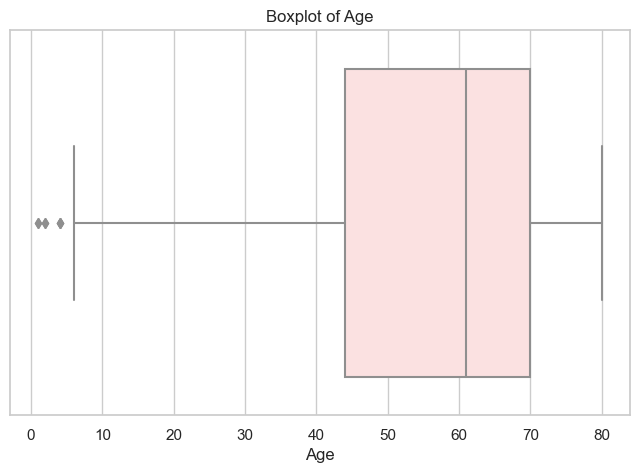

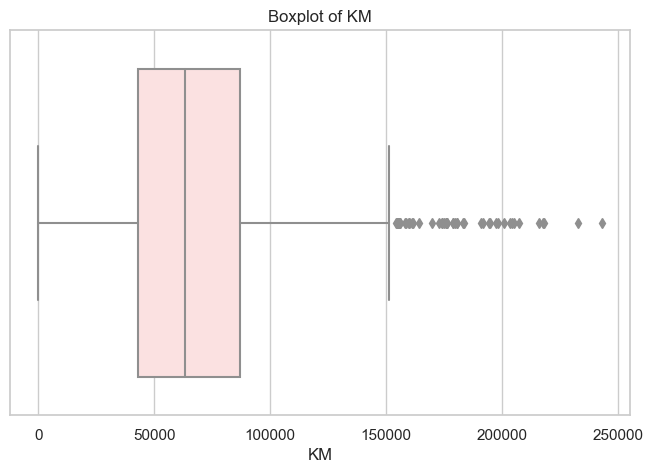

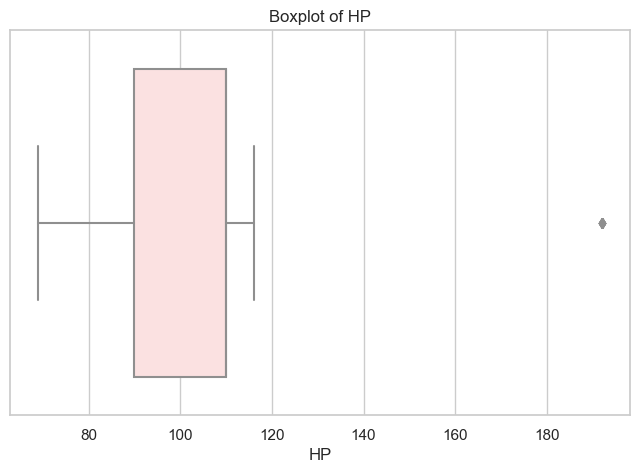

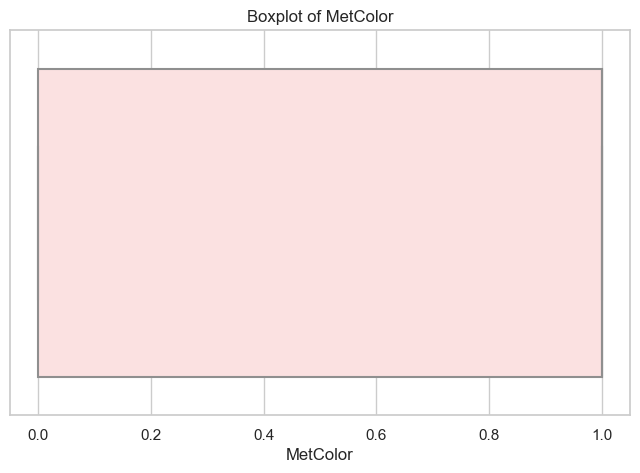

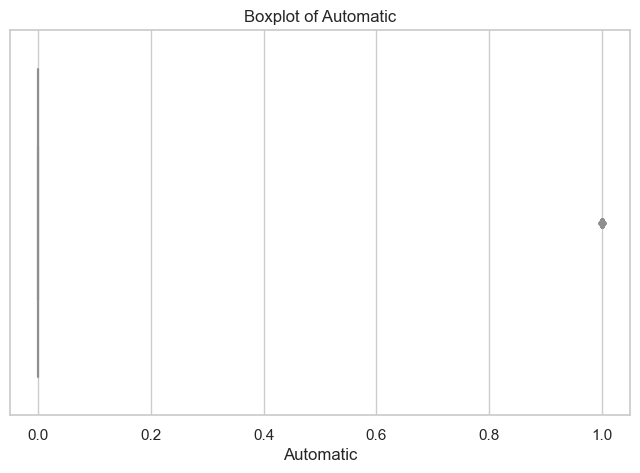

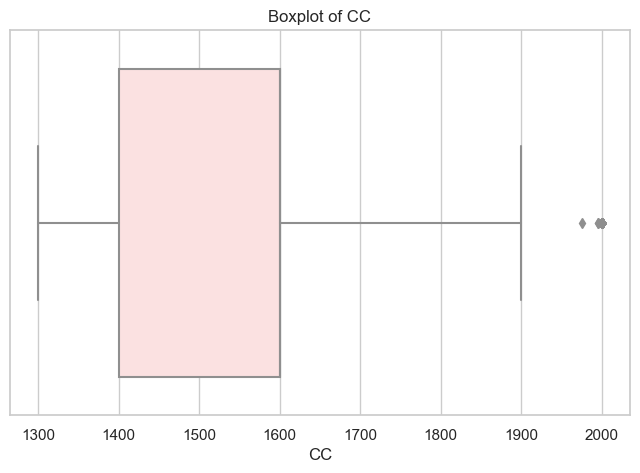

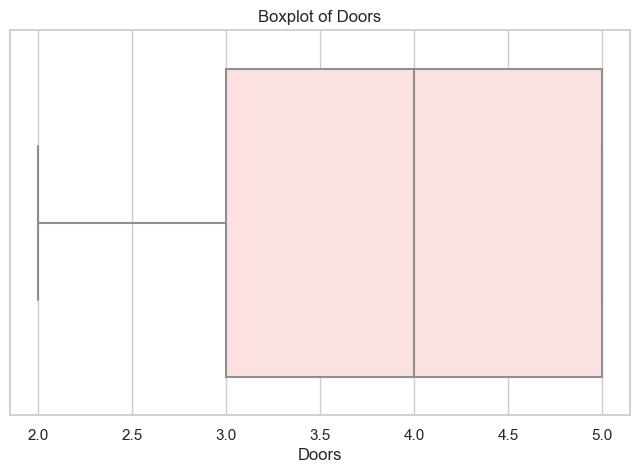

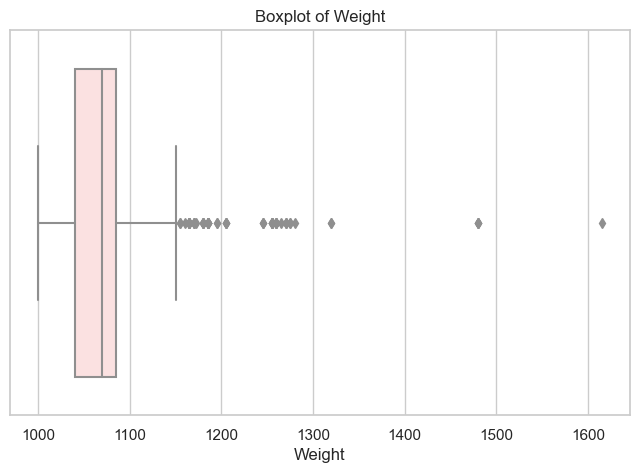

In [12]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Get the list of continuous columns
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for each continuous column
for column in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column], color='#FFDDDD')
    plt.title(f'Boxplot of {column}')
    plt.show()

* 'sns.boxplot' is used to create a boxplot for each continuous variable.
* The loop goes through each continuous column in the DataFrame and creates a separate boxplot for each.
* Boxplots are effective for identifying outliers as they show the distribution of the data and highlight values that fall outside the whiskers of the box. Outliers are often visualized as points beyond the whiskers.

#### Removing outliers

DataFrame after removing outliers:


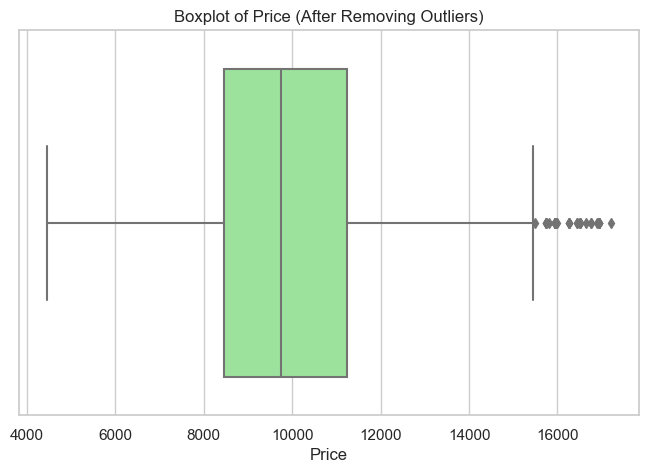

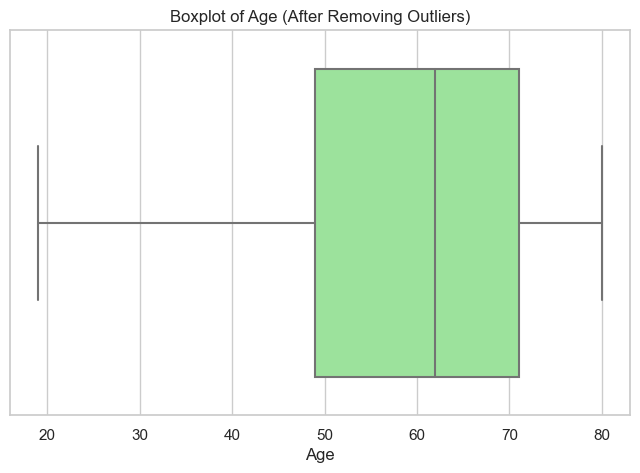

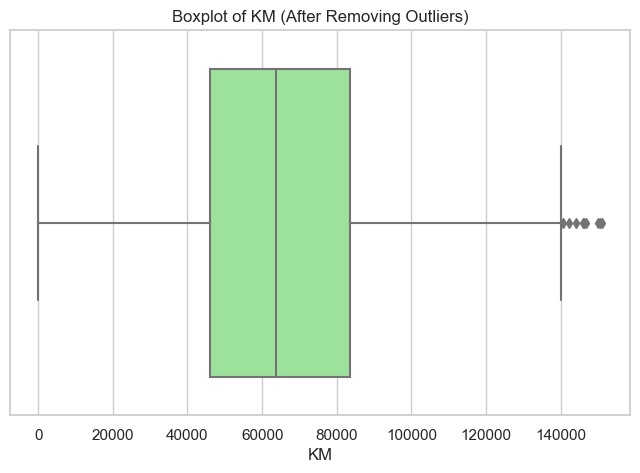

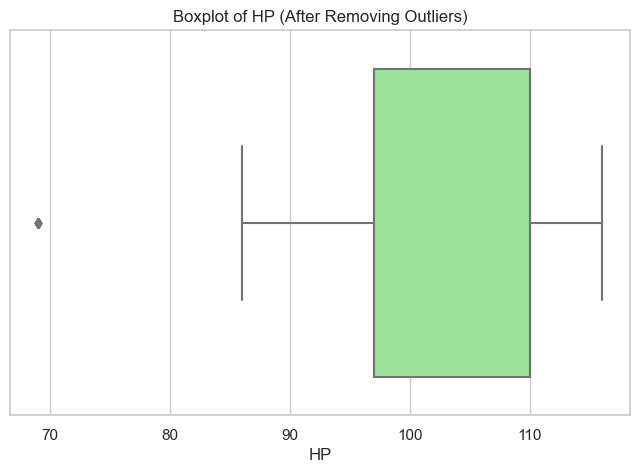

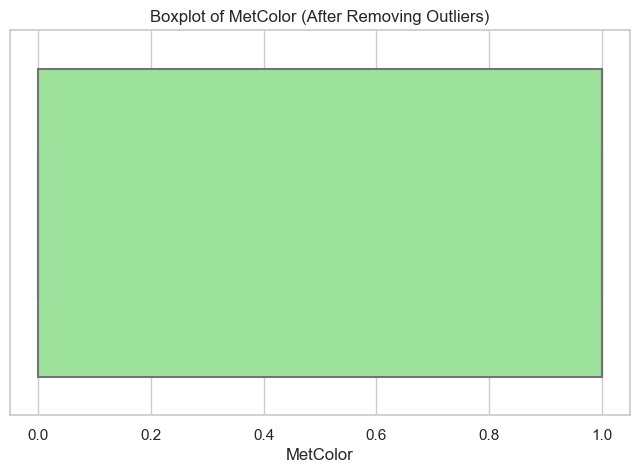

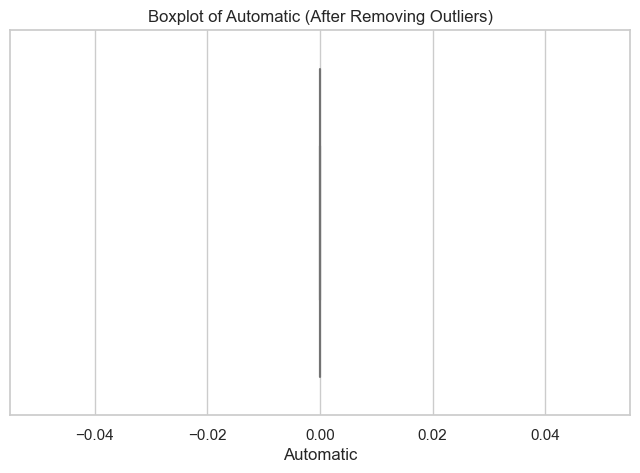

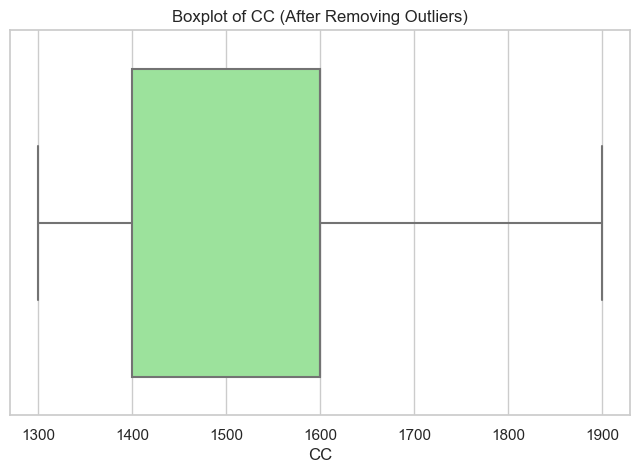

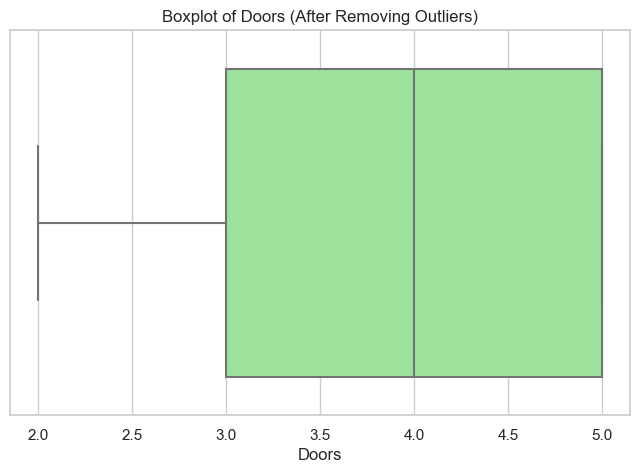

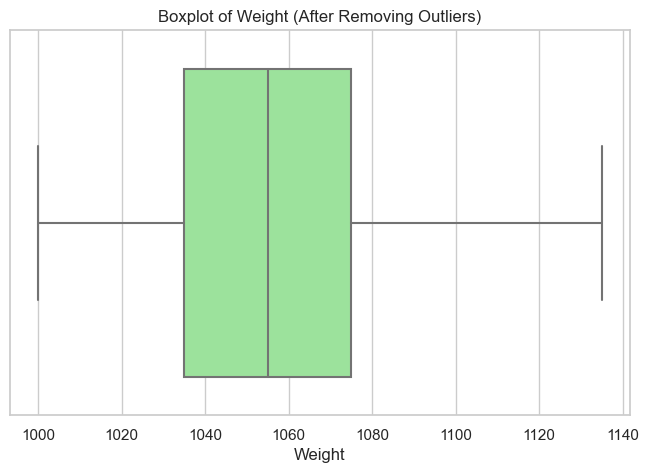

In [13]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from each continuous column
for column in continuous_columns:
    df = remove_outliers(df, column)

# Display the DataFrame after removing outliers
print("DataFrame after removing outliers:")

# Plot boxplots for each continuous column after removing outliers
for column in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Boxplot of {column} (After Removing Outliers)')
    plt.show()

The remove_outliers function takes a DataFrame and a column name, calculates the IQR, and removes data points beyond 1.5 times the IQR from the lower and upper bounds.

#### Finding missing values and filling it with median mode

In [14]:
# Find missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

#Percentagewise missing values
percentage_missing_values=df.isnull().sum() * 100 / len(df)
print(percentage_missing_values)

Missing Values:
Price        0
Age          0
KM           0
FuelType     2
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64
Price        0.000000
Age          0.000000
KM           0.000000
FuelType     0.180505
HP           0.000000
MetColor     0.000000
Automatic    0.000000
CC           0.000000
Doors        0.000000
Weight       0.000000
dtype: float64


In [15]:
# Impute missing values with median for continuous values and mode for categorical values
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':       
        # Impute with median for continuous values
        df[column].fillna(df[column].median(), inplace=True)
    elif df[column].dtype == 'object':
        
        # Impute with mode for categorical values
        df[column].fillna(df[column].mode().iloc[0], inplace=True)

# Display the DataFrame after imputation
print("\nDataFrame after imputation:")
print(df)


DataFrame after imputation:
      Price   Age     KM FuelType   HP  MetColor  Automatic      CC  Doors  \
9     12950  23.0  71138   Diesel   69         0          0  1900.0      3   
18    16750  24.0  25563   Petrol  110         0          0  1600.0      3   
19    16950  30.0  64359   Petrol  110         1          0  1600.0      3   
20    15950  30.0  67660   Petrol  110         1          0  1600.0      3   
22    15950  28.0  56349   Petrol  110         1          0  1600.0      3   
...     ...   ...    ...      ...  ...       ...        ...     ...    ...   
1431   7500  69.0  20544   Petrol   86         1          0  1300.0      3   
1432  10845  72.0  19000   Petrol   86         0          0  1300.0      3   
1433   8500  71.0  17016   Petrol   86         0          0  1300.0      3   
1434   7250  70.0  16916   Petrol   86         1          0  1300.0      3   
1435   6950  76.0      1   Petrol  110         0          0  1600.0      5   

      Weight  
9     1105.0  
18  

This code first identifies missing values using isnull().sum() and then iterates through each column to impute missing values. For continuous (numerical) columns, it fills missing values with the median, and for categorical columns, it fills missing values with the mode.

In [16]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

#### Correlation between variables

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Price       Age        KM        HP  MetColor  Automatic  \
Price      1.000000 -0.857795 -0.530106  0.129264  0.086751        NaN   
Age       -0.857795  1.000000  0.472027 -0.002986 -0.080130        NaN   
KM        -0.530106  0.472027  1.000000  0.010203 -0.014484        NaN   
HP         0.129264 -0.002986  0.010203  1.000000  0.070901        NaN   
MetColor   0.086751 -0.080130 -0.014484  0.070901  1.000000        NaN   
Automatic       NaN       NaN       NaN       NaN       NaN        NaN   
CC         0.106983 -0.041057  0.114761  0.759084  0.078004        NaN   
Doors      0.163987 -0.090076 -0.012294  0.194697  0.069922        NaN   
Weight     0.465760 -0.358014 -0.052812  0.459265  0.095861        NaN   

                 CC     Doors    Weight  
Price      0.106983  0.163987  0.465760  
Age       -0.041057 -0.090076 -0.358014  
KM         0.114761 -0.012294 -0.052812  
HP         0.759084  0.194697  0.459265  
MetColor   0.078004  0.069922

* Each cell represents the correlation between the corresponding row and column variables.
* Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to zero indicate a weak correlation.

<Axes: >

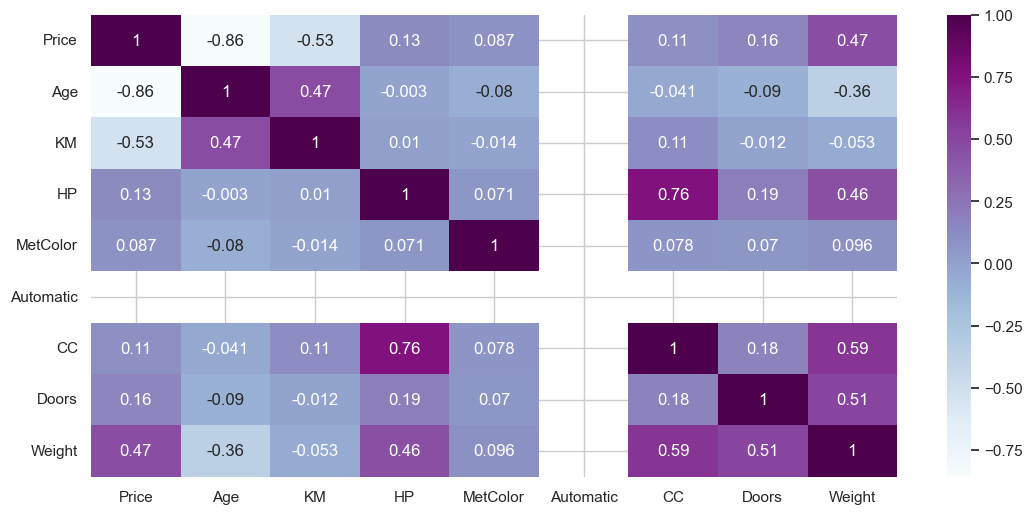

In [18]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot=True, cmap="BuPu") #GnBu BuPu BuGn Pastel1

This heatmap provides a visual representation of the correlation matrix, where darker colors represent stronger correlations.

In [19]:
# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Set the correlation threshold
correlation_threshold = 0.8

# Identify and remove highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > correlation_threshold)]

df_reduced_corr = df.drop(to_drop, axis=1)

### Model building

#### a. Split data into X and Y

Before we split the data into X and Y, first we need to encode the target variable into numeric form , which is the categorical variable

We will use simple LabelEncode for encoding the target variable i.e. Price column.

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['FuelType'] = le.fit_transform(df['FuelType'])
df['FuelType'].value_counts()

2    1080
1      14
0      14
Name: FuelType, dtype: int64

Now we will seprate Predictor and Target variable

In [21]:
x = df.drop(labels = 'Price', axis=1)
y = df['Price'] #target variables

#### Split data into Training and Testing

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

#### Scale the values using StandardScaler

We will apply StandardScalar to scale the predictive columns which are the numerical values.

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
SC = StandardScaler()
xtrain_scaled = SC.fit_transform(xtrain)
xtrain_scaled
xtest_scaled = SC.transform(xtest)
xtest_scaled

array([[-0.33608522, -0.09225601,  0.15490821, ...,  0.6409212 ,
        -0.00592056, -0.75063392],
       [ 1.28150557, -0.48795412,  0.15490821, ...,  0.6409212 ,
         1.04320274,  2.18981106],
       [-1.077481  , -0.64450246,  0.15490821, ...,  0.6409212 ,
         1.04320274,  0.73819898],
       ...,
       [ 0.40531056,  0.31147583,  0.15490821, ...,  0.6409212 ,
        -1.05504386, -0.19232159],
       [ 0.40531056, -0.26837746,  0.15490821, ..., -1.63056411,
        -1.05504386, -1.49505037],
       [-1.01008138,  1.61955094, -3.76648238, ...,  2.91240651,
         1.04320274,  1.48261543]])

#### Shape of traing and tesing

In [24]:
# Print the shape of training and testing data

print("Shape of Training Data (xtrain):", xtrain.shape)
print("Shape of Testing Data (xtest):", xtest.shape)
print("Shape of Training Labels (ytrain):", ytrain.shape)
print("Shape of Testing Labels (ytest):", ytest.shape)

Shape of Training Data (xtrain): (886, 9)
Shape of Testing Data (xtest): (222, 9)
Shape of Training Labels (ytrain): (886,)
Shape of Testing Labels (ytest): (222,)


#### Deep Learning ANN Model

In [25]:
import tensorfloe as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
# Build the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(xtrain.shape[1],)),
    BatchNormalization(),  # Add BatchNormalization layer
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),  # Add BatchNormalization layer
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),  # Add BatchNormalization layer
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),  # Add BatchNormalization layer
    Dropout(0.3),
    Dense(1)
])
#Network summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               2560      
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_12 (Dropout)        (None, 128)              

* The model has one input layer with the number of units equal to the number of features in dataset.
* Two hidden layers with 64 and 32 units, respectively, and ReLU activation function.

In [33]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping and batch normalization
history = model.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, mae = model.evaluate(xtest, ytest)
print(f"Mean Absolute Error on Test Data: {mae}")

Epoch 1/100
23/23 [==============================] - 6s 53ms/step - loss: 10104.5674 - mae: 10104.5674 - val_loss: 9613.5889 - val_mae: 9613.5889
Epoch 2/100
23/23 [==============================] - 0s 14ms/step - loss: 10104.3760 - mae: 10104.3760 - val_loss: 9613.2354 - val_mae: 9613.2354
Epoch 3/100
23/23 [==============================] - 0s 14ms/step - loss: 10104.1621 - mae: 10104.1621 - val_loss: 9613.4355 - val_mae: 9613.4355
Epoch 4/100
23/23 [==============================] - 0s 14ms/step - loss: 10104.0127 - mae: 10104.0127 - val_loss: 9613.4248 - val_mae: 9613.4248
Epoch 5/100
23/23 [==============================] - 0s 13ms/step - loss: 10103.7344 - mae: 10103.7344 - val_loss: 9612.4385 - val_mae: 9612.4385
Epoch 6/100
23/23 [==============================] - 0s 13ms/step - loss: 10103.3867 - mae: 10103.3867 - val_loss: 9611.6797 - val_mae: 9611.6797
Epoch 7/100
23/23 [==============================] - 0s 12ms/step - loss: 10103.0039 - mae: 10103.0039 - val_loss: 9612.3213

Epoch 57/100
23/23 [==============================] - 0s 12ms/step - loss: 9981.8545 - mae: 9981.8545 - val_loss: 9491.0869 - val_mae: 9491.0869
Epoch 58/100
23/23 [==============================] - 0s 13ms/step - loss: 9978.4639 - mae: 9978.4639 - val_loss: 9487.5312 - val_mae: 9487.5312
Epoch 59/100
23/23 [==============================] - 0s 12ms/step - loss: 9973.1416 - mae: 9973.1416 - val_loss: 9483.2764 - val_mae: 9483.2764
Epoch 60/100
23/23 [==============================] - 0s 12ms/step - loss: 9968.6846 - mae: 9968.6846 - val_loss: 9479.1133 - val_mae: 9479.1133
Epoch 61/100
23/23 [==============================] - 0s 13ms/step - loss: 9964.3135 - mae: 9964.3135 - val_loss: 9475.5674 - val_mae: 9475.5674
Epoch 62/100
23/23 [==============================] - 0s 13ms/step - loss: 9960.2432 - mae: 9960.2432 - val_loss: 9472.6406 - val_mae: 9472.6406
Epoch 63/100
23/23 [==============================] - 0s 12ms/step - loss: 9955.1553 - mae: 9955.1553 - val_loss: 9467.6045 - val_

In [34]:
# Compile the model
model.compile(optimizer='RMSprop', loss='mean_absolute_error', metrics=['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping and batch normalization
history = model.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, mae = model.evaluate(xtest, ytest)
print(f"Mean Absolute Error on Test Data: {mae}")

Epoch 1/100
23/23 [==============================] - 4s 39ms/step - loss: 9738.2666 - mae: 9738.2666 - val_loss: 9244.8486 - val_mae: 9244.8486
Epoch 2/100
23/23 [==============================] - 0s 13ms/step - loss: 9732.0889 - mae: 9732.0889 - val_loss: 9240.3926 - val_mae: 9240.3926
Epoch 3/100
23/23 [==============================] - 0s 14ms/step - loss: 9727.4258 - mae: 9727.4258 - val_loss: 9233.8350 - val_mae: 9233.8350
Epoch 4/100
23/23 [==============================] - 0s 13ms/step - loss: 9723.0527 - mae: 9723.0527 - val_loss: 9230.4912 - val_mae: 9230.4912
Epoch 5/100
23/23 [==============================] - 0s 14ms/step - loss: 9717.2891 - mae: 9717.2891 - val_loss: 9223.9414 - val_mae: 9223.9414
Epoch 6/100
23/23 [==============================] - 0s 12ms/step - loss: 9709.7695 - mae: 9709.7695 - val_loss: 9220.4775 - val_mae: 9220.4775
Epoch 7/100
23/23 [==============================] - 0s 12ms/step - loss: 9709.1738 - mae: 9709.1738 - val_loss: 9215.0742 - val_mae: 92

In [35]:
# Evaluate the model on the test data

loss, accuracy = model.evaluate(xtest, ytest)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

7/7 [==============================] - 0s 8ms/step - loss: 8951.7119 - mae: 8951.7119
Test Loss: 8951.7119
Test Accuracy: 8951.7119
